In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('all')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[

In [3]:
# Loading the data

df = pd.read_csv('csv_order\CardiB.csv')
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\rajro\AppData\Local\Temp\ipykernel_32280\4170498351.py:3: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('csv_order\CardiB.csv')


,Artist,Title,Album,Date,Lyric,Year
0,Cardi B,WAP,Unknown,2020-08-07,cardi b al t mclaran megan thee stallion whor...,2020.0
1,Cardi B,Bodak Yellow,Invasion of Privacy,2017-06-16,ksr it's cardi ayy said i'm the shit they can'...,2017.0
2,Cardi B,Bartier Cardi,Invasion of Privacy,2017-12-22,cardi b savage bardi in a 'rari diamonds all...,2017.0
3,Cardi B,Be Careful,Invasion of Privacy,2018-03-30,yeah care for me care for me care for me uh ye...,2018.0
4,Cardi B,Money,Unknown,2018-10-22,look my bitches all bad my niggas all real i r...,2018.0


**Data Cleaning**

In [4]:
# Removing irrelevant columns
df.drop(['Artist', 'Year', 'Date'], axis=1, inplace = True)
df.head()

,Title,Album,Lyric
0,WAP,Unknown,cardi b al t mclaran megan thee stallion whor...
1,Bodak Yellow,Invasion of Privacy,ksr it's cardi ayy said i'm the shit they can'...
2,Bartier Cardi,Invasion of Privacy,cardi b savage bardi in a 'rari diamonds all...
3,Be Careful,Invasion of Privacy,yeah care for me care for me care for me uh ye...
4,Money,Unknown,look my bitches all bad my niggas all real i r...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   75 non-null     object
 1   Album   75 non-null     object
 2   Lyric   75 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


In [6]:
# Since there are NaN in Lyric column, casting the column type as string
# Then NaN will be removed later

df = df.astype({'Lyric':'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   75 non-null     object
 1   Album   75 non-null     object
 2   Lyric   75 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


In [7]:
df.shape

(75, 3)

In [8]:
# As can be seen in the df, there are artist names in the Lyric
# Listing the possible names mentioned here

name_list = [
'cardi b', 'cardi', 'bardi', 'bacardi', 'belcalis', 'almanzar', 'la cardi',
'offset', 'kulture', 'wave', 'migos', 'hennessy', 'quavo', 'takeoff',
'meg', 'megan thee stallion', 'bruno mars', 'sza', 'lizzo', 'gaga',
'kehlani', 'chance the rapper', '21 savage', 'bad bunny', 'j balvin',
'mariah', 'madonna', 'lady diana', 'christian louboutin', 'steve madden',
'jimmy choo', 'balenciaga', 'fendi', 'tom ford', 'saint laurent',
'birkin', 'hermès', 'cartier', 'zara', 'fashion nova', 'versace',
'nicki minaj', 'remy ma', 'lil kim', 'j.lo', 'jennifer lopez',
'el alfa', 'ozuna', 'anuel aa', 'maluma', 'karol g',
'bernie sanders', 'joe biden', 'donald trump', 'nancy pelosi',
'bodak yellow', 'blood', 'crip', 'bronx'
]
names = '|'.join(name_list)

df[df['Lyric'].str.contains(names)]

,Title,Album,Lyric
0,WAP,Unknown,cardi b al t mclaran megan thee stallion whor...
1,Bodak Yellow,Invasion of Privacy,ksr it's cardi ayy said i'm the shit they can'...
2,Bartier Cardi,Invasion of Privacy,cardi b savage bardi in a 'rari diamonds all...
4,Money,Unknown,look my bitches all bad my niggas all real i r...
5,Press,Unknown,monsta's gon' tear it up bardi woo yeah bitche...
...,...,...,...
69,Won’t change*,Unknown,snippet lyrics i won't change for nobodynobody...
70,Up (Radio Edit),Unknown,up up up ayy up uh up look this is fire once...
71,Do Me Dat Remix (Region Liberty Records / Atla...,Unknown,artist cardi b song do me dat remix featuring ...
72,Cardi B’s Tattoos,Unknown,faceneckhand red star right armloyalty over r...


In [9]:
# Function to clean lyrics

def cleaning_lyrics(lyric):
    if lyric != "nan":
        for name in name_list:
            lyric = lyric.replace(name, '').strip()
            lyric = lyric.lower()
    else:
        lyric = lyric.replace("nan", '').strip()
    return lyric

# Apply the function to the 'Lyric' column

df['Cleaned Lyric'] = df['Lyric'].apply(cleaning_lyrics)
df

,Title,Album,Lyric,Cleaned Lyric
0,WAP,Unknown,cardi b al t mclaran megan thee stallion whor...,al t mclaran an thee stallion whores in this ...
1,Bodak Yellow,Invasion of Privacy,ksr it's cardi ayy said i'm the shit they can'...,ksr it's ayy said i'm the shit they can't fuc...
2,Bartier Cardi,Invasion of Privacy,cardi b savage bardi in a 'rari diamonds all...,savage in a 'rari diamonds all over my body 0...
3,Be Careful,Invasion of Privacy,yeah care for me care for me care for me uh ye...,yeah care for me care for me care for me uh ye...
4,Money,Unknown,look my bitches all bad my niggas all real i r...,look my bitches all bad my niggas all real i r...
...,...,...,...,...
70,Up (Radio Edit),Unknown,up up up ayy up uh up look this is fire once...,up up up ayy up uh up look this is fire once...
71,Do Me Dat Remix (Region Liberty Records / Atla...,Unknown,artist cardi b song do me dat remix featuring ...,artist song do me dat remix featuring branson...
72,Cardi B’s Tattoos,Unknown,faceneckhand red star right armloyalty over r...,faceneckhand red star right armloyalty over r...
73,The Good (Unreleased),Unknown,whats this now how could this happen after eve...,whats this now how could this happen after eve...


In [10]:
# Generating Wordcloud

STOPWORDS = STOPWORDS

wc = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        height=2000,
        width=2000,
        max_words=200, 
        min_font_size=10, 
        relative_scaling=0.5
)

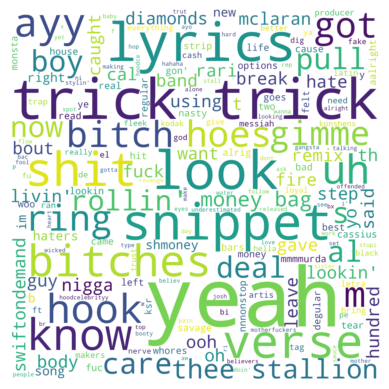

In [11]:
wc.generate(df['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Text Analysis using TextBlob**

In [12]:
# Removing stopwords and tokenizing cleaned lyrics for sentiment analysis

def tokenizing(lyrics):
    tokens = word_tokenize(lyrics)
    filtered_tokens = []
    for token in tokens:
        if token not in stopwords.words('english'):
            filtered_tokens.append(token)
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

df['Tokenized Lyric'] = df['Cleaned Lyric'].apply(tokenizing)
df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric
0,WAP,Unknown,cardi b al t mclaran megan thee stallion whor...,al t mclaran an thee stallion whores in this ...,al mclaran thee stallion whores house 's whore...
1,Bodak Yellow,Invasion of Privacy,ksr it's cardi ayy said i'm the shit they can'...,ksr it's ayy said i'm the shit they can't fuc...,ksr 's ayy said 'm shit ca n't fuck wanted n't...
2,Bartier Cardi,Invasion of Privacy,cardi b savage bardi in a 'rari diamonds all...,savage in a 'rari diamonds all over my body 0...,savage 'rari diamonds body 0 fool one shinin '...
3,Be Careful,Invasion of Privacy,yeah care for me care for me care for me uh ye...,yeah care for me care for me care for me uh ye...,yeah care care care uh yeah look wan na get ma...
4,Money,Unknown,look my bitches all bad my niggas all real i r...,look my bitches all bad my niggas all real i r...,look bitches bad niggas real ride dick big tal...
...,...,...,...,...,...
70,Up (Radio Edit),Unknown,up up up ayy up uh up look this is fire once...,up up up ayy up uh up look this is fire once...,ayy uh look fire upon time man heard ugly came...
71,Do Me Dat Remix (Region Liberty Records / Atla...,Unknown,artist cardi b song do me dat remix featuring ...,artist song do me dat remix featuring branson...,artist song dat remix featuring branson forbes...
72,Cardi B’s Tattoos,Unknown,faceneckhand red star right armloyalty over r...,faceneckhand red star right armloyalty over r...,faceneckhand red star right armloyalty royalty...
73,The Good (Unreleased),Unknown,whats this now how could this happen after eve...,whats this now how could this happen after eve...,whats could happen everything ive passed life ...


In [13]:
# Sentiment analysis using VADER

sia = SentimentIntensityAnalyzer()

In [14]:
def sentiment(tokenized):
    sentiment_score = sia.polarity_scores(tokenized)
    
    return sentiment_score

df['Sentiment Score'] = df['Tokenized Lyric'].apply(sentiment)

df[['Neg', 'Neu', 'Pos', 'Compound']] = df['Sentiment Score'].apply(pd.Series)

df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric,Sentiment Score,Neg,Neu,Pos,Compound
0,WAP,Unknown,cardi b al t mclaran megan thee stallion whor...,al t mclaran an thee stallion whores in this ...,al mclaran thee stallion whores house 's whore...,"{'neg': 0.187, 'neu': 0.628, 'pos': 0.185, 'co...",0.187,0.628,0.185,-0.9581
1,Bodak Yellow,Invasion of Privacy,ksr it's cardi ayy said i'm the shit they can'...,ksr it's ayy said i'm the shit they can't fuc...,ksr 's ayy said 'm shit ca n't fuck wanted n't...,"{'neg': 0.145, 'neu': 0.69, 'pos': 0.165, 'com...",0.145,0.690,0.165,0.4401
2,Bartier Cardi,Invasion of Privacy,cardi b savage bardi in a 'rari diamonds all...,savage in a 'rari diamonds all over my body 0...,savage 'rari diamonds body 0 fool one shinin '...,"{'neg': 0.4, 'neu': 0.45, 'pos': 0.15, 'compou...",0.400,0.450,0.150,-0.9995
3,Be Careful,Invasion of Privacy,yeah care for me care for me care for me uh ye...,yeah care for me care for me care for me uh ye...,yeah care care care uh yeah look wan na get ma...,"{'neg': 0.223, 'neu': 0.509, 'pos': 0.269, 'co...",0.223,0.509,0.269,0.4218
4,Money,Unknown,look my bitches all bad my niggas all real i r...,look my bitches all bad my niggas all real i r...,look bitches bad niggas real ride dick big tal...,"{'neg': 0.256, 'neu': 0.586, 'pos': 0.158, 'co...",0.256,0.586,0.158,-0.9956
...,...,...,...,...,...,...,...,...,...,...
70,Up (Radio Edit),Unknown,up up up ayy up uh up look this is fire once...,up up up ayy up uh up look this is fire once...,ayy uh look fire upon time man heard ugly came...,"{'neg': 0.133, 'neu': 0.703, 'pos': 0.164, 'co...",0.133,0.703,0.164,0.9454
71,Do Me Dat Remix (Region Liberty Records / Atla...,Unknown,artist cardi b song do me dat remix featuring ...,artist song do me dat remix featuring branson...,artist song dat remix featuring branson forbes...,"{'neg': 0.061, 'neu': 0.881, 'pos': 0.058, 'co...",0.061,0.881,0.058,0.7527
72,Cardi B’s Tattoos,Unknown,faceneckhand red star right armloyalty over r...,faceneckhand red star right armloyalty over r...,faceneckhand red star right armloyalty royalty...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
73,The Good (Unreleased),Unknown,whats this now how could this happen after eve...,whats this now how could this happen after eve...,whats could happen everything ive passed life ...,"{'neg': 0.341, 'neu': 0.495, 'pos': 0.164, 'co...",0.341,0.495,0.164,-0.9883


In [15]:
# Categorize the sentiment as Positive, Neutral, and Negative

def categorize(x):
    if x > 0:
        return "Positive"
    if x < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Compound'].apply(categorize)
df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric,Sentiment Score,Neg,Neu,Pos,Compound,Sentiment
0,WAP,Unknown,cardi b al t mclaran megan thee stallion whor...,al t mclaran an thee stallion whores in this ...,al mclaran thee stallion whores house 's whore...,"{'neg': 0.187, 'neu': 0.628, 'pos': 0.185, 'co...",0.187,0.628,0.185,-0.9581,Negative
1,Bodak Yellow,Invasion of Privacy,ksr it's cardi ayy said i'm the shit they can'...,ksr it's ayy said i'm the shit they can't fuc...,ksr 's ayy said 'm shit ca n't fuck wanted n't...,"{'neg': 0.145, 'neu': 0.69, 'pos': 0.165, 'com...",0.145,0.690,0.165,0.4401,Positive
2,Bartier Cardi,Invasion of Privacy,cardi b savage bardi in a 'rari diamonds all...,savage in a 'rari diamonds all over my body 0...,savage 'rari diamonds body 0 fool one shinin '...,"{'neg': 0.4, 'neu': 0.45, 'pos': 0.15, 'compou...",0.400,0.450,0.150,-0.9995,Negative
3,Be Careful,Invasion of Privacy,yeah care for me care for me care for me uh ye...,yeah care for me care for me care for me uh ye...,yeah care care care uh yeah look wan na get ma...,"{'neg': 0.223, 'neu': 0.509, 'pos': 0.269, 'co...",0.223,0.509,0.269,0.4218,Positive
4,Money,Unknown,look my bitches all bad my niggas all real i r...,look my bitches all bad my niggas all real i r...,look bitches bad niggas real ride dick big tal...,"{'neg': 0.256, 'neu': 0.586, 'pos': 0.158, 'co...",0.256,0.586,0.158,-0.9956,Negative
...,...,...,...,...,...,...,...,...,...,...,...
70,Up (Radio Edit),Unknown,up up up ayy up uh up look this is fire once...,up up up ayy up uh up look this is fire once...,ayy uh look fire upon time man heard ugly came...,"{'neg': 0.133, 'neu': 0.703, 'pos': 0.164, 'co...",0.133,0.703,0.164,0.9454,Positive
71,Do Me Dat Remix (Region Liberty Records / Atla...,Unknown,artist cardi b song do me dat remix featuring ...,artist song do me dat remix featuring branson...,artist song dat remix featuring branson forbes...,"{'neg': 0.061, 'neu': 0.881, 'pos': 0.058, 'co...",0.061,0.881,0.058,0.7527,Positive
72,Cardi B’s Tattoos,Unknown,faceneckhand red star right armloyalty over r...,faceneckhand red star right armloyalty over r...,faceneckhand red star right armloyalty royalty...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,Neutral
73,The Good (Unreleased),Unknown,whats this now how could this happen after eve...,whats this now how could this happen after eve...,whats could happen everything ive passed life ...,"{'neg': 0.341, 'neu': 0.495, 'pos': 0.164, 'co...",0.341,0.495,0.164,-0.9883,Negative


**Visualizing the Sentiment**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

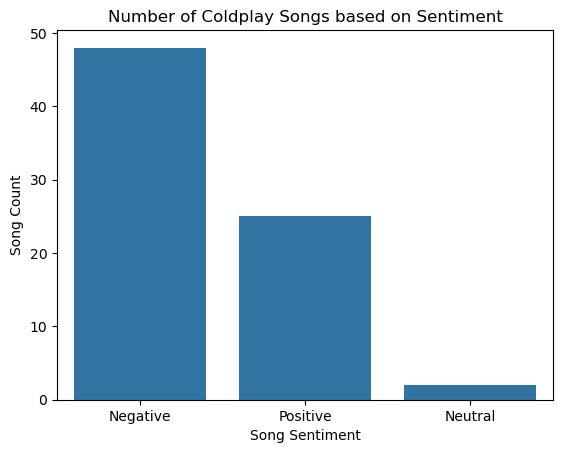

In [17]:
sns.countplot(x=df['Sentiment'], data=df).set(title='Number of Coldplay Songs based on Sentiment')
plt.xlabel('Song Sentiment')
plt.ylabel('Song Count')
plt.show()

**How's the sentiment in each album?**

In [18]:
album_sentiment = df.groupby('Album')['Compound'].mean().reset_index().sort_values(by='Compound', ascending = False).reset_index(drop=True)
album_sentiment.head()

,Album,Compound
0,Invasion of Privacy,0.276318
1,"Gangsta Bitch Music, Vol. 1",0.002750
2,"Gangsta Bitch Music, Vol. 2",-0.295173
3,Unknown,-0.340610
4,"Gangsta Bitch Music, Vol. 1 (Promo CD)",-0.455642


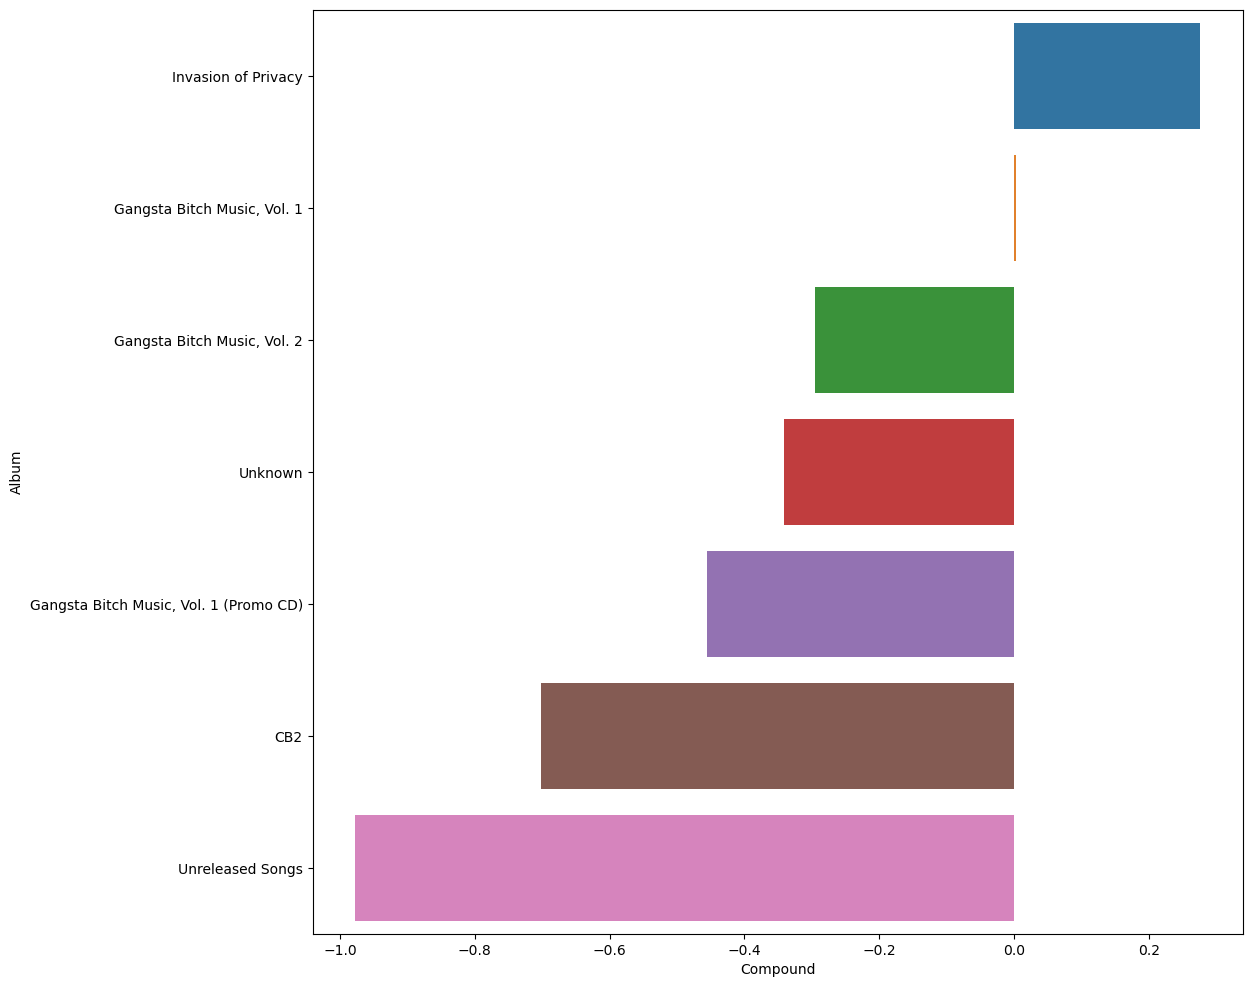

In [19]:
plt.figure(figsize =(12,12))
sns.barplot(x='Compound', y='Album', data = album_sentiment, hue='Album')
plt.show()

**Which songs has the most positive and most negative sentiment?**

In [20]:
pos_song = df[df['Compound'] == df['Compound'].max()]
neg_song = df[df['Compound'] == df['Compound'].min()]

print(f"The most positive song is {pos_song['Title'].to_string(index=False)} with a sentiment value of {pos_song['Compound'].to_string(index=False)}")
print(f"The most negative song is {neg_song['Title'].to_string(index=False)} with a sentiment value of {neg_song['Compound'].to_string(index=False)} ")

The most positive song is Best Life with a sentiment value of 0.9996
The most negative song is Bartier Cardi with a sentiment value of -0.9995 


In [21]:
pd.set_option('display.max_colwidth', None)

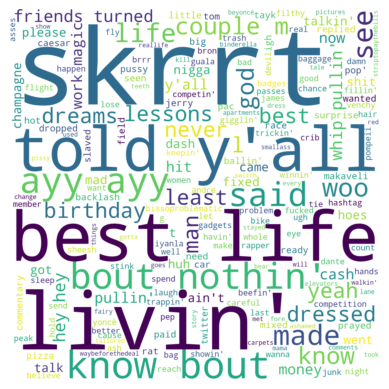

In [22]:
# Wordcloud of the most positive song

wc.generate(pos_song['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

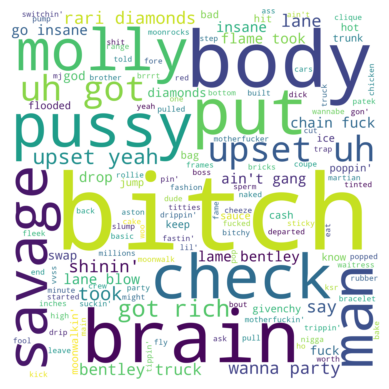

In [23]:
# Wordcloud of the most negative song

wc.generate(neg_song['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion**

From this analysis, here are some key takeaways:
1. The most common words in Cardi B songs are "yeah", "trick", "bitch" and "shit"
2. Majority of Cardi B songs has negative sentiment, which might be correlated to how their songs
3. "Invasion of Privacy" appears to be the most positive album
3. The most positive song is "Best Life" and words like "best", "skrrt", "life", and "livvin" are most spoken. 
4. On the other hand, "Bartier Cardi" is the most negative song in this database, which is manifested in the title itself. Words like "bitch", "brain", "body" and "pussy" are the most common one